First step in any ML endeavor is to get raw data from system. Raw data can be anything from logfile, database file, JSON file, CSV file or excel file. Furthermore, we want to retrieve data from multiple sources. Here, I'm trying to cover almost all possible ways to retrieve data. For experimental purpose, sometimes we may need to generate our own dataset. This method is also explained through this tutorial.

# # Loading pre-existing dataset:

scikit-learn comes with different inbuilt datasets to play with. They often called as "Toy datasets" because of their comparative less size and clean dataset.

In [1]:
from sklearn import datasets
digits = datasets.load_digits()

features = digits.data

target = digits.target

'''
Other datasets available are:
load_boston
load_iris
load_digits
'''

'\nOther datasets available are:\nload_boston\nload_iris\nload_digits\n'

# # Creating simulated dataset:

## Dataset for regression

In [6]:
from sklearn.datasets import make_regression

features, target, coefficients = make_regression(n_samples = 100, n_features = 1, n_informative = 1, n_targets=1,
                                                 noise = 1.010, coef = True)

#features return X
#target return output value
#coefficients return actual coefficient of linear regression

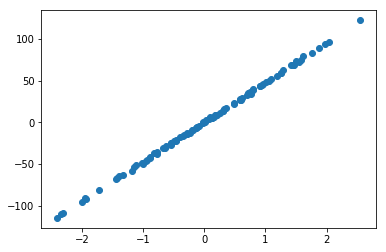

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(features[:], target[:])

## Dataset for classification

In [17]:
from sklearn.datasets import make_classification

# USing default parameters
features, target = make_classification()

# Loading CSV file, EXCEL file, json file, SQL database file

pandas library is used for doing loading comma-separated-value file.

In [20]:
import pandas as pd

# pd.read_csv(path_or_url_of_csv_file)

url = 'https://tinyurl.com/simulated_data'
dataframe = pd.read_csv(url)

dataframe.head()

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [21]:
#Reading excel file.
# sheetnumber 0 is read by dataframe
# sheetname accepts string as well as number as an argument
# To read more than one sheets, we can use as sheetname = [0, 1, 2, 'Monthly Sales']

url = 'https://tinyurl.com/simulated_excel'

# Load data
dataframe = pd.read_excel(url, sheetname=0, header=1)

# View the first two rows
dataframe.head(2)

ImportError: Install xlrd >= 0.9.0 for Excel support

In [22]:
# To read JSON file
# Load library
import pandas as pd

# Create URL
url = 'https://tinyurl.com/simulated_json'

# Load data
dataframe = pd.read_json(url, orient='columns')

# View the first two rows
dataframe.head(2)

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

Importing JSON file into pandas is similar to last few recipes we've seen. orient parameter determines how json file is structured. However, it might take some experimenting to figure out which argument (split, records, index, columns, and values) is the right one. Another helpful tool pandas offers is json_normalize, which can help convert semistructured JSON data into a pandas DataFrame.

## Querying SQL database
Out of all methods we've seen, this is the one which is used widely in real world. In this recipe we first use create_engine to define a connection to a SQL database engine called SQLite. Next we use pandas’ read_sql_query to query that database using SQL and put the results in a DataFrame.

In [23]:
# Load libraries
import pandas as pd
from sqlalchemy import create_engine

# Create a connection to the database
database_connection = create_engine('sqlite:///sample.db')

# Load data
dataframe = pd.read_sql_query('SELECT * FROM data', database_connection)

# View first two rows
dataframe.head(2)

ModuleNotFoundError: No module named 'sqlalchemy'